### 1.Loading data and importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Choose a dataset with at least 20,000 observations
df = pd.read_csv(r"C:\Users\ninic\Downloads\train_2v.csv")
df.head()


### 2. Data Cleaning and Preprocessing

In [ ]:
# Identification and Handling of Missing Values

# Perform initial exploration to understand the data structure, types of variables, and identify errors or missing values
df.info()

# Identify missing values
df.describe()

# Identifying and handling missing values
df.isnull().sum()

# Handle missing values by filling bmi with the median value
df['bmi'].fillna(df['bmi'].median(), inplace=True)

# Checking the 'bmi' distributions
sns.histplot(df['bmi'])
plt.show()

# Fill missing 'bmi' based on the average per 'age' group
df['bmi'] = df.groupby('age')['bmi'].transform(lambda x: x.fillna(x.mean()))

# Checking the 'bmi' distributions again
sns.histplot(df['bmi'])
plt.show()

# Smoking is a known risk factor for stroke. Remove patients with unknown smoking status as it could be a confounding factor in the analysis.
df.dropna(subset=['smoking_status'], inplace=True)

# Checking for children with stroke
df[(df['work_type'] == 'children') & (df['stroke'] == 1)]

# Error Correction and Inconsistencies
# Remove records with 'other' gender as they have no information
df = df[df['gender'].isin(['Female', 'Male'])]

# Correct binary columns
df['hypertension'] = df['hypertension'].apply(lambda x: 'no hypertension' if x == 0 else 'hypertension')
df['heart_disease'] = df['heart_disease'].apply(lambda x: 'no heart disease' if x == 0 else 'heart disease')
df['stroke'] = df['stroke'].apply(lambda x: 'no stroke' if x == 0 else 'stroke')

# Outliers Detection and Handling

# Detect and handle outliers in age, avg_glucose_level, and bmi
q10, q25, q50, q75 = df['age'].quantile([0.10, 0.25, 0.50, 0.75]).values
Iqr = q75 - q25
lf = int(q25 - 1.5 * Iqr)
uf = int(q75 + 1.5 * Iqr)
range_outlier_age = tuple([lf, uf])
df['age'].describe()

# No outliers in 'age' as all values are within (-10, 105)
out_age = df['age'][uf < df['age']]
out_age

# For 'avg_glucose_level' and 'bmi', high values are risk factors, so we keep the outliers
plt.figure(figsize=(15, 8))
numerical = ['avg_glucose_level', 'bmi', 'age']
for i, j in enumerate(numerical):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(x=df['stroke'], y=df[j])
    plt.title(f'stroke vs {j}')
plt.xticks(rotation=90)
plt.show()


### 3. Data Types and Formatting

In [ ]:
# Ensure correct data types and consistent formatting
df.info()

string_columns = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'stroke']
for i in string_columns:
    df[i] = df[i].astype('string')

# Strip and lowercase all string columns
for i in string_columns:
    df[i] = df[i].str.strip().str.lower()

df.head()

# Feature Engineering

# Removing useless column 'id'
df.drop(['id'], inplace=True, axis=1)

# Grouping by gender and stroke for basic statistics
counts_df = len(df)
result_2 = df.groupby(['gender', 'stroke']).agg(
    n=('gender', 'size'),
    percentage=('gender', lambda x: (x.size / counts_df) * 100),
    age_mean=('age', 'mean'),
    age_sd=('age', 'std')
).reset_index()
result_2


### 4. Feature Engieering

In [ ]:

# Grouping by gender and stroke for basic statistics
counts_df = len(df)
result_2 = df.groupby(['gender', 'stroke']).agg(
    n=('gender', 'size'),
    percentage=('gender', lambda x: (x.size / counts_df) * 100),
    age_mean=('age', 'mean'),
    age_sd=('age', 'std')
).reset_index()
result_2
df2 = df.copy()

# Create a new feature 'ever_smoked'
df['ever_smoked'] = df['smoking_status'].apply(lambda x: 'smoked' if x in ['smokes', 'formerly smoked'] else 'no smoked')
df2 = df.copy()
df



### 5. Encoding of Categorical Variables


In [ ]:
f2 = df.copy()

# Encode categorical variables using Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
columns = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'ever_smoked', 'stroke']

for i in columns:
    df[i + '_encoded'] = le.fit_transform(df[i])

# Drop original categorical columns after encoding
for i in columns:
    df.drop([i], axis=1, inplace=True)

df.head()

### 6. Scaling of Numerical Features


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numeric_cols = ['age', 'avg_glucose_level', 'bmi']

# Fit and transform the training data
df_scaled = scaler.fit_transform(df[numeric_cols])
df_scaled_2 = pd.DataFrame(df_scaled, columns=numeric_cols)

# Ensure consistency in scaling across the dataset
df_scaled_final = pd.concat([df.drop(['age', 'avg_glucose_level', 'bmi'], axis=1).reset_index(drop=True), df_scaled_2], axis=1)
df_scaled_final.head()

# Plotting correlation matrix
plt.figure(figsize=(15, 8))
sns.heatmap(df_scaled_final.corr(), annot=True, cmap='coolwarm')
plt.show()

### 6. Data Visualization


#### 6.1 Visualizing continuous data

In [ ]:
plt.figure(figsize=(15, 10))  # Create a new figure with a specified figure size

# Define the list of continuous columns
continous_data = ["age", "avg_glucose_level", "bmi"]

# Iterate through each continuous column
for i, column in enumerate(continous_data, 1):
    # Create a subplot for the current continuous column
    plt.subplot(len(continous_data), 1, i)

    # Create a histogram plot for the current continuous column with kernel density estimation (kde) and density statistics (stat="density")
    sns.histplot(df2[column], kde=True, stat="density")

    # Add vertical lines for the mean and median of the data
    plt.axvline(df2[column].mean(), color='r', linestyle='--', label='Mean')
    plt.axvline(df2[column].median(), color='g', linestyle='-', label='Median')

    # Add a legend to the plot
    plt.legend()

    # Set the title, x-axis label, and y-axis label for the plot
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Density")

# Adjust the layout of subplots
plt.tight_layout()

# Display the plot
plt.show()


#### 6.2 Visualizing categorical data

In [ ]:
sns.set_style("whitegrid")
colors = sns.color_palette("pastel")
plt.figure(figsize=(12, 8))

# Define the list of categorical columns
categorical_data = ["gender", "hypertension", "heart_disease", "ever_married", "work_type", "ever_smoked", "stroke"]

# Iterate through each categorical column
for i, column in enumerate(categorical_data):
    plt.subplot(2, 4, i+1)
    ax = sns.countplot(x=column, data=df2, palette=colors)

    plt.title(f"Distribution of {column}")
    plt.xlabel("")
    plt.ylabel("Count")
    plt.xticks(rotation=45)

    # Add count values on top of each bar
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width() / 2., p.get_height(), f'{int(p.get_height())}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()

# Display the plot
plt.show()


#### 6.3 Density plot of age by stroke status

In [ ]:
sns.pairplot(data=df2, hue='stroke', palette='husl')
plt.show()


#### 6.4 Density Plot of Age by Stroke Status

In [ ]:
df_age_stroke = df2[['stroke', 'age']]

# Ensure the palette keys match the values in the 'stroke' column
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_age_stroke, x='age', hue='stroke', fill=True, 
            palette={'stroke': 'orange', 'no stroke': 'skyblue'}, common_norm=False)
plt.title('Age Distribution by Stroke Status')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend(title='Stroke')
plt.show()

#### 6.5 Stacked Bar Plot for Smoking Status and Stroke

In [ ]:
stroke_smoking_counts = df2.groupby(['ever_smoked', 'stroke']).size().reset_index(name='count')
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='ever_smoked', y='count', hue='stroke', data=stroke_smoking_counts, palette={'stroke': 'orange', 'no stroke': 'skyblue'})
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), f'{int(p.get_height())}', ha='center', va='bottom', fontsize=10)
plt.title('Relationship Between Strokes and Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.legend(title='Stroke')
plt.show()

#### 6.6 Violin Plot for Stroke and Average Glucose Level

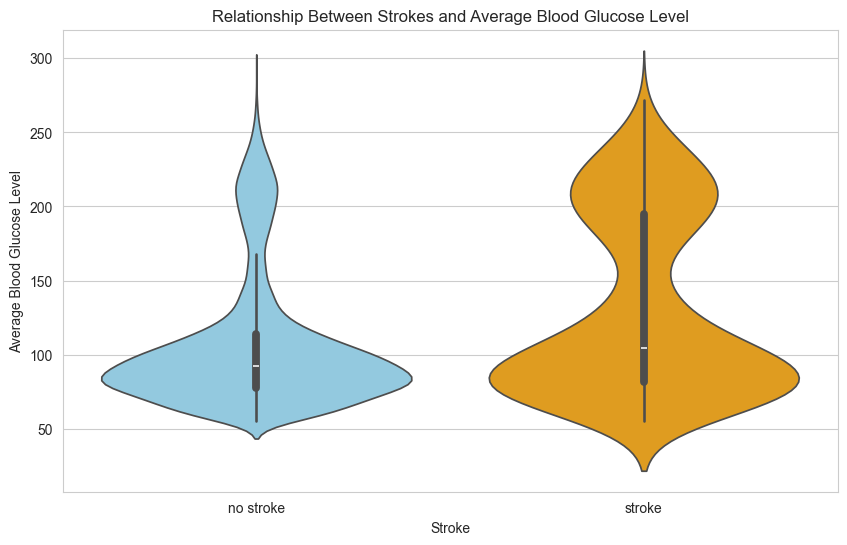

In [59]:
df_avg_glucose_stroke = df2[['stroke', 'avg_glucose_level']].reset_index(drop=True)
plt.figure(figsize=(10, 6))
sns.violinplot(x='stroke', y='avg_glucose_level', data=df_avg_glucose_stroke, palette={'no stroke': 'skyblue', 'stroke': 'orange'})
plt.title('Relationship Between Strokes and Average Blood Glucose Level')
plt.xlabel('Stroke')
plt.ylabel('Average Blood Glucose Level')
plt.show()

### 7. Balancing the Data

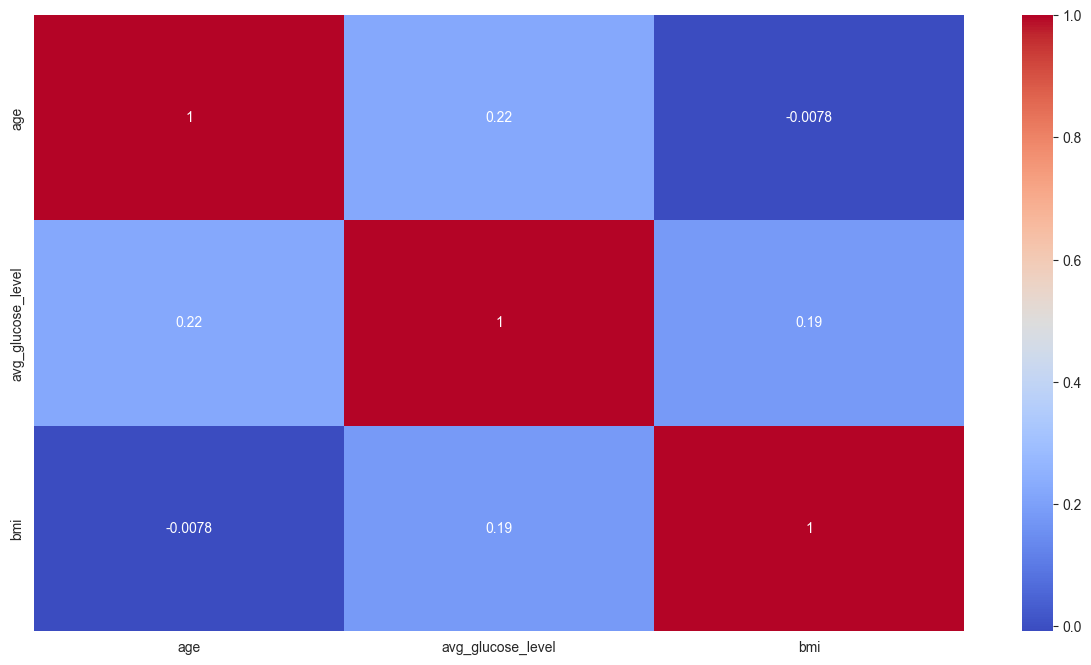

In [60]:
from sklearn.utils import resample

df_positive = df2[df2['stroke'] == 'stroke']
df_negative = df2[df2['stroke'] == 'no stroke']
n_samples = min(len(df_positive), len(df_negative))

# Subsampling negative examples to equal the number of positive examples
df_negative_resampled = resample(df_negative, replace=False, n_samples=n_samples, random_state=42)

# Merging subsampled DataFrames
df_balanced = pd.concat([df_positive, df_negative_resampled])

# Optional: Shuffle the resulting DataFrame
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Visualize the Balanced Data - Correlation Matrix
plt.figure(figsize=(15, 8))
numeric_columns = df_balanced.select_dtypes(include=['float64', 'int64']).columns
sns.heatmap(df_balanced[numeric_columns].corr(), annot=True, cmap='coolwarm')
plt.show()

### 8. Models Analysis.

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, recall_score
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
import lime.lime_tabular
import shap
import joblib


#### 8.1 Prepare the Data

In [62]:
# Load the dataset and separate features and target
X = df_scaled_final.drop(columns=['stroke_encoded'])
y = df_scaled_final['stroke_encoded']

# Split data in training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


#### 8.2 Train, Evaluate, and Save Models

In [63]:
def train_evaluate_save(model, model_name, X_train, y_train, X_test, y_test, resampler=None):
    """
    Train the model, evaluate it, and save it.
    """
    # Apply resampling if provided (for imbalanced data)
    if resampler:
        X_train_resampled, y_train_resampled = resampler.fit_resample(X_train, y_train)
    else:
        X_train_resampled, y_train_resampled = X_train, y_train
    
    # Train the model
    model.fit(X_train_resampled, y_train_resampled)
    
    # Predict on test data
    y_pred = model.predict(X_test)
    
    # Evaluate model performance
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    
    print(f'\n{model_name} Performance:')
    print(f'Accuracy: {accuracy:.2f}')
    print(f'F1 Score: {f1:.2f}')
    print(f'Recall: {recall:.2f}')
    print('Classification Report:')
    print(classification_report(y_test, y_pred))
    print('Confusion Matrix:')
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='coolwarm', fmt='d', annot_kws={"size": 10})
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    # Save the model
    joblib.dump(model, f'{model_name}.h5')

    return model


#### 8.3 Interpret the Model with LIME

In [64]:
def interpret_model(model, model_name, X_train, X_test):
    """
    Interpret model with LIME and SHAP.
    """
    # LIME
    explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values, feature_names=X.columns, 
                                                       class_names=['No Stroke', 'Stroke'], discretize_continuous=True)
    exp = explainer.explain_instance(X_test.iloc[0].values, model.predict_proba)
    exp.show_in_notebook(show_table=True, show_all=False)
    exp.as_pyplot_figure()
    plt.show()
    


#### 8.4 Train, evaluate, and interpret Logistic Regression


Logistic_Regression Performance:
Accuracy: 0.72
F1 Score: 0.82
Recall: 0.72
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.72      0.83      8856
           1       0.05      0.79      0.10       174

    accuracy                           0.72      9030
   macro avg       0.52      0.75      0.47      9030
weighted avg       0.98      0.72      0.82      9030

Confusion Matrix:


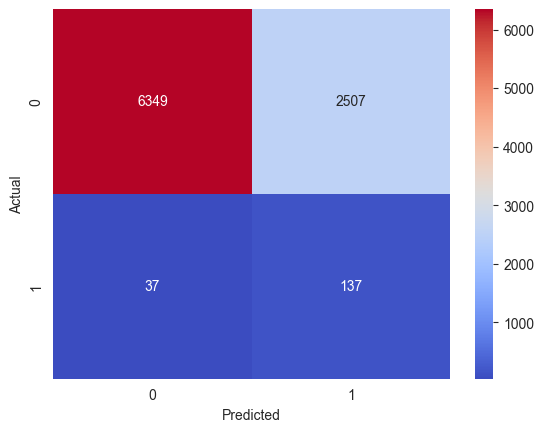

c:\Users\ninic\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


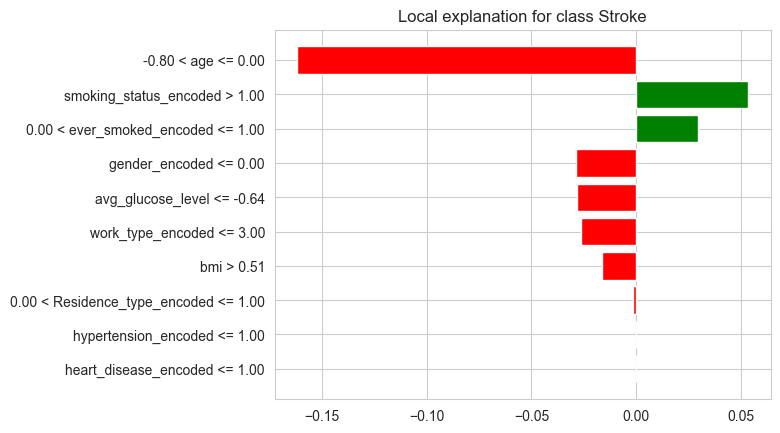

In [65]:

logistic_model = LogisticRegression(max_iter=1000, random_state=42)
under_sampler = RandomUnderSampler(random_state=42)

logistic_model = train_evaluate_save(logistic_model, 'Logistic_Regression', X_train, y_train, X_test, y_test, resampler=under_sampler)
interpret_model(logistic_model, 'Logistic_Regression', X_train, X_test)


#### 8.5 Train, evaluate, and interpret Naive Bayes



Naive_Bayes Performance:
Accuracy: 0.73
F1 Score: 0.83
Recall: 0.73
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.73      0.84      8856
           1       0.05      0.75      0.10       174

    accuracy                           0.73      9030
   macro avg       0.52      0.74      0.47      9030
weighted avg       0.98      0.73      0.83      9030

Confusion Matrix:


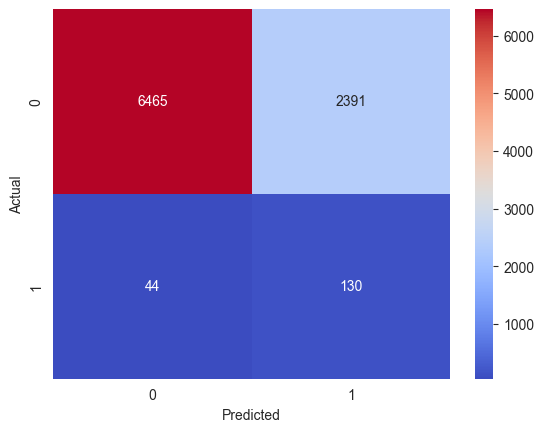

c:\Users\ninic\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


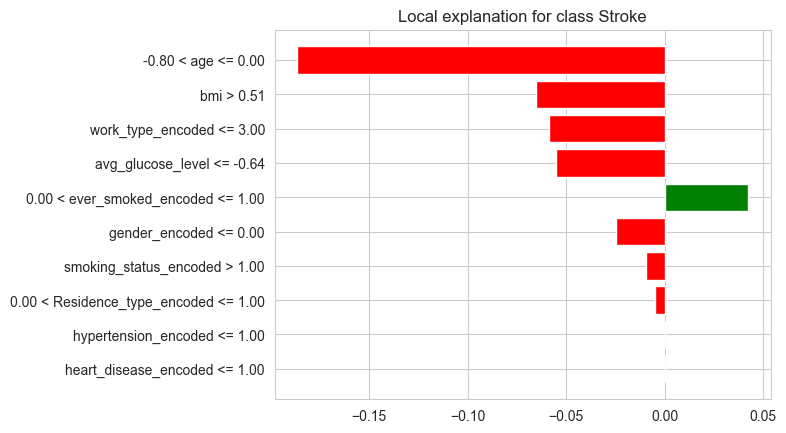

In [66]:

nb_model = GaussianNB()
over_sampler = RandomOverSampler(random_state=42)

nb_model = train_evaluate_save(nb_model, 'Naive_Bayes', X_train, y_train, X_test, y_test, resampler=over_sampler)
interpret_model(nb_model, 'Naive_Bayes', X_train, X_test)


#### 8.6 Train, evaluate, and interpret Decision Tree



Decision_Tree Performance:
Accuracy: 0.66
F1 Score: 0.78
Recall: 0.66
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.66      0.79      8856
           1       0.04      0.72      0.08       174

    accuracy                           0.66      9030
   macro avg       0.52      0.69      0.43      9030
weighted avg       0.97      0.66      0.78      9030

Confusion Matrix:


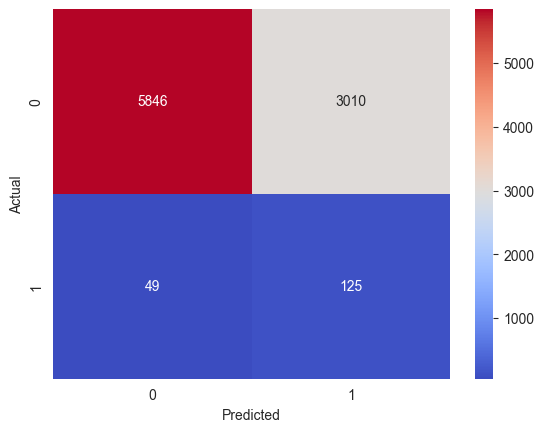

c:\Users\ninic\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


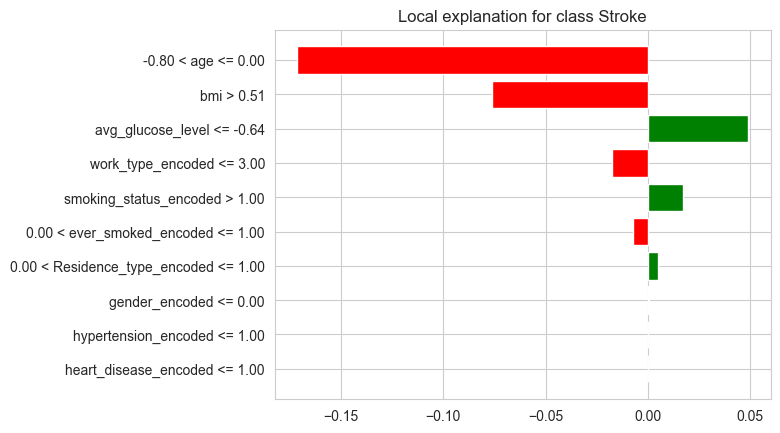

In [67]:
# Train, evaluate, and interpret Decision Tree

dt_model = DecisionTreeClassifier(random_state=42)
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}
grid_search = GridSearchCV(dt_model, param_grid, cv=5, scoring='accuracy')

dt_model = train_evaluate_save(grid_search, 'Decision_Tree', X_train, y_train, X_test, y_test, resampler=under_sampler)
interpret_model(dt_model, 'Decision_Tree', X_train, X_test)


#### 8.7 Train, evaluate, and interpret Random Forest



Random_Forest Performance:
Accuracy: 0.68
F1 Score: 0.79
Recall: 0.68
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.68      0.81      8856
           1       0.05      0.80      0.09       174

    accuracy                           0.68      9030
   macro avg       0.52      0.74      0.45      9030
weighted avg       0.98      0.68      0.79      9030

Confusion Matrix:


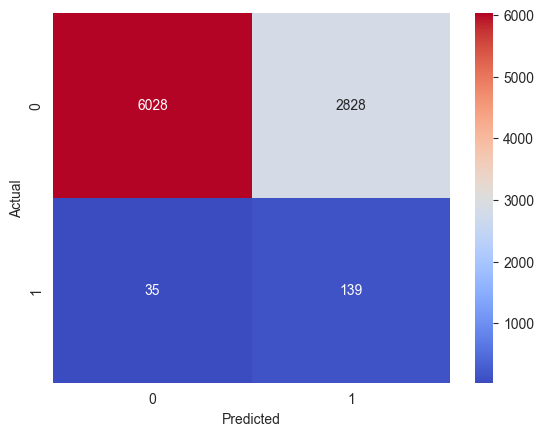

c:\Users\ninic\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


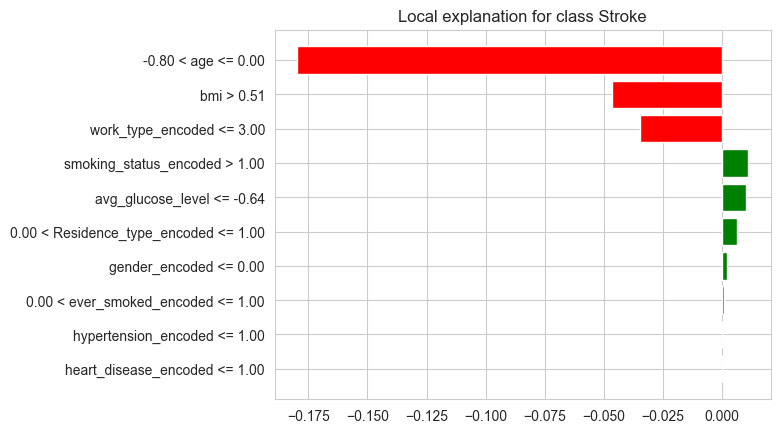

In [68]:
# Train, evaluate, and interpret Random Forest

rf_model = RandomForestClassifier(random_state=42)
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}
grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=5, scoring='accuracy')

rf_model = train_evaluate_save(grid_search_rf, 'Random_Forest', X_train, y_train, X_test, y_test, resampler=under_sampler)
interpret_model(rf_model, 'Random_Forest', X_train, X_test)


#### 8.8 Train, evaluate, and interpret Random SVC



SVC Performance:
Accuracy: 0.71
F1 Score: 0.81
Recall: 0.71
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.71      0.83      8856
           1       0.05      0.80      0.10       174

    accuracy                           0.71      9030
   macro avg       0.52      0.76      0.46      9030
weighted avg       0.98      0.71      0.81      9030

Confusion Matrix:


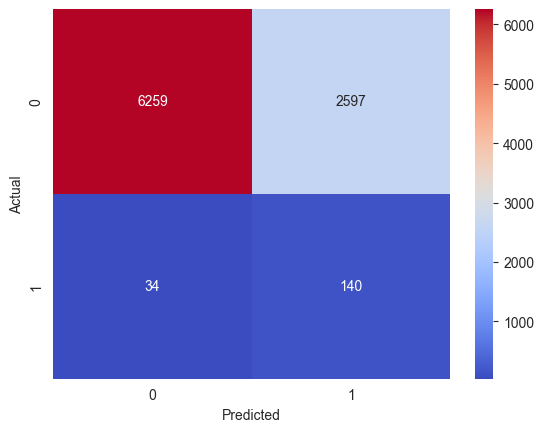

AttributeError: This 'SVC' has no attribute 'predict_proba'

In [69]:
# Train, evaluate, and interpret SVC

svc_model = SVC(kernel='linear', random_state=42)

svc_model = train_evaluate_save(svc_model, 'SVC', X_train, y_train, X_test, y_test, resampler=over_sampler)
interpret_model(svc_model, 'SVC', X_train, X_test)
